<a id="section-one"></a>
# Exploratory Data Analysis
Here I will explore the dataset, explore each feature of the customers, perform descriptive analysis, and visualize the relationship between the variables.\
The Data is Stored in an Excel file with two excel sheets, one for the data description, and the order contains the customer data.

In [1]:
!pip install fancyimpute

In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report
from fancyimpute import IterativeImputer

In [3]:
#read the data from the excel file
description = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
data = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [4]:
#preview the data
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
#check the shape of the dataset
print(data.shape)

(5630, 20)


In [6]:
#brief information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
#print summary statistics of the data including the categorical columns
data.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


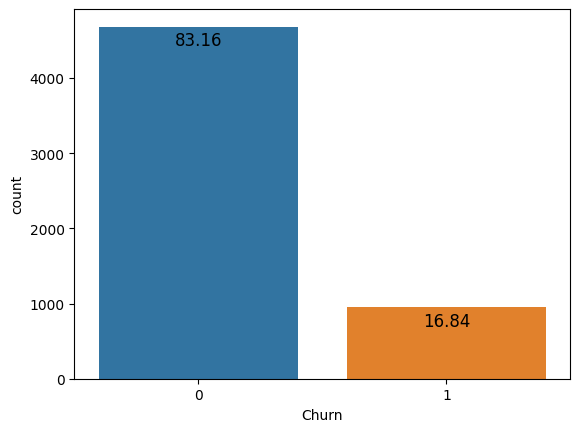

In [8]:
#count the number of customers in the churn and not churn class
ax = sns.countplot(x='Churn', data=data)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

**There are more retained than churned customers, the ratio of retained to churned is approximately 5 to 1, so the churn rate is very low, which is normal therefore making the data imbalanced.**

### Distribution of the Tenure of the customers on the platform

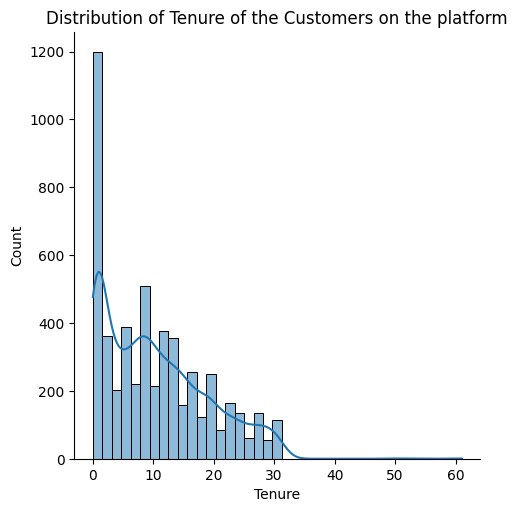

In [9]:
sns.displot(x='Tenure', kde=True, data=data)
plt.title("Distribution of Tenure of the Customers on the platform")
plt.show()

### Distribution of Order Count of customers

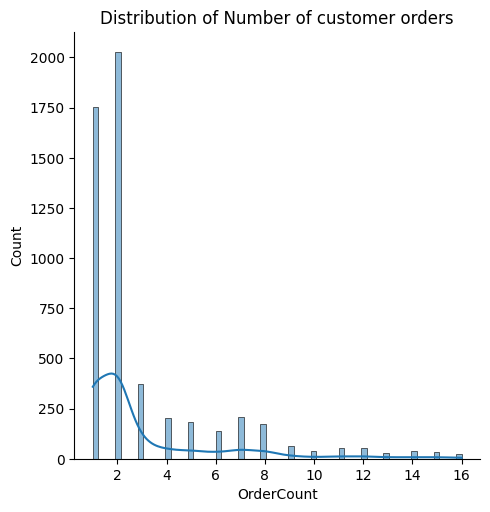

In [10]:
sns.displot(x='OrderCount', kde=True, data=data)
plt.title("Distribution of Number of customer orders")
plt.show()

### Distribution of Amount returned for money spent by customers
Cashback is a reward that refunds a percentage of the money spent to by a customer to him/her, It is usually dependent on the amount spent, so the cashback column can be used in place of the amount spent columns.

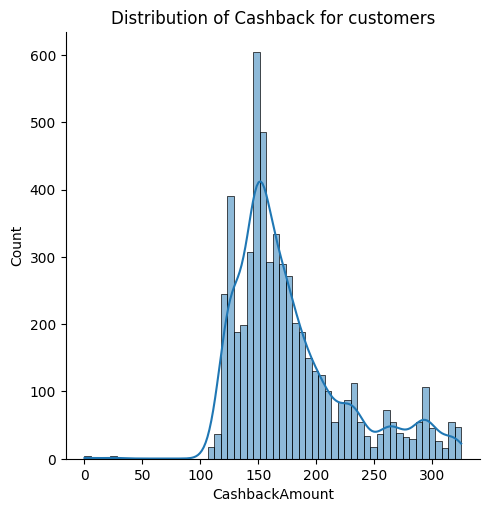

In [11]:
sns.displot(x='CashbackAmount',kde=True, data=data)
plt.title('Distribution of Cashback for customers')
plt.show()

### Distribution of Hours spent on the app by the customers

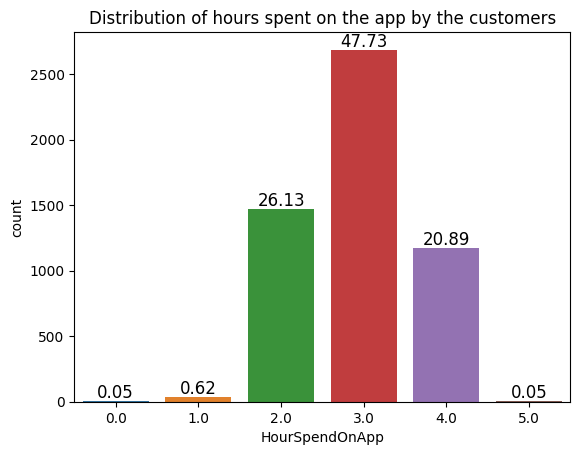

In [13]:
axx = sns.countplot(x='HourSpendOnApp', data=data)
for a in axx.patches:
    axx.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 6),textcoords='offset points')
plt.title("Distribution of hours spent on the app by the customers")
plt.show()

### Distribution of Gender for churned and retained customers

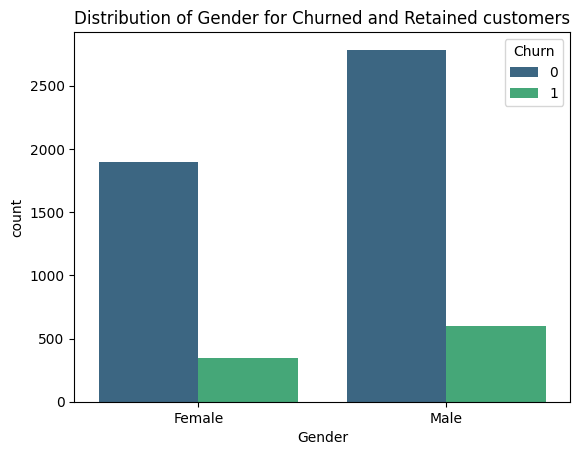

In [15]:
sns.countplot(x='Gender', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of Gender for Churned and Retained customers")
plt.show()

### Distribution of marital status for churned and retained customers

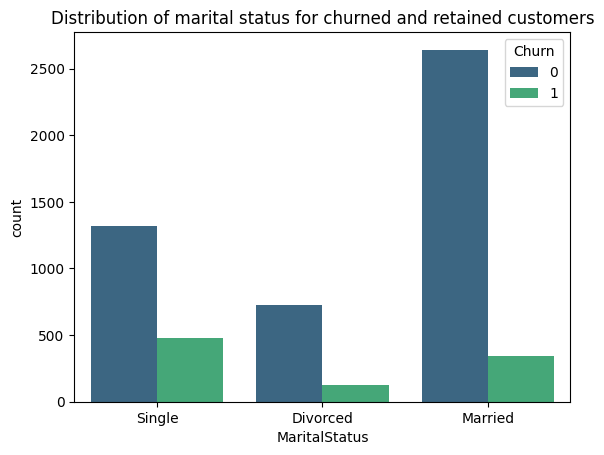

In [16]:
sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of marital status for churned and retained customers")
plt.show()

**Findings**
--
From the Analysis;
* **The Tenure, Days since last order, cashback amount, and warehouse to home features have outliers, but the outliers don't have huge impact on tree models, which will be my final model so I will keep them.**
* **Most of the customers spend 3 hours on the app, and 94.75% of the customers spend between 2 and 4 hours on the app**
* **Single people have higher churn rate than other Marital Status**


Data Preprocessing

In [19]:
#count the number of missing values across each columns
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [21]:
#description of data
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


<a id="subsection-two"></a>
## Categorical Encoding
Here I will encode the categorical variables as numeric variables, since machine learning algorithms work on numbers and not text. I will use the pandas get_dummies function which applies one-hot encoding to all the variables passed to it.

In [25]:
cat_data = data.select_dtypes(include='object')
cat_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [26]:
#encode categorical variables and add it to the normal dataset
encoded = pd.get_dummies(cat_data,drop_first=True)

data_enc = pd.concat([data.drop(cat_data.columns, axis=1), encoded], axis=1)
data_enc.drop('CustomerID', axis=1,inplace=True)

<a id="section-three"></a>
# Model Development


In [27]:
#selecting features and target variable, and splitting the data
X=data_enc.drop(['Churn'],axis=1)
y=data_enc['Churn']

In [28]:
imputer = IterativeImputer(random_state=42)
scaler = StandardScaler()
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

In [29]:

X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

#cross validation
skfcv=StratifiedKFold(n_splits=5)

In [30]:
# Storing acc of all models
acc_score_mat = {}

### Logistic Regression

In [31]:
log = LogisticRegression()

#cross validate logistic regression model
print(f"Cross validation score for Logistic Regression: {np.mean(cross_val_score(log, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Logistic Regression: 0.6268737047957512


In [32]:
#use logistic regression pipeline to predict test sample
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score:",acc)
acc_score_mat["Logistic Regression"] = acc

Accuracy Score: 0.8925399644760214


In [33]:
#classification report:
cc =  classification_report(y_test,y_pred)
print(cc)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       936
           1       0.76      0.53      0.62       190

    accuracy                           0.89      1126
   macro avg       0.84      0.75      0.78      1126
weighted avg       0.88      0.89      0.88      1126



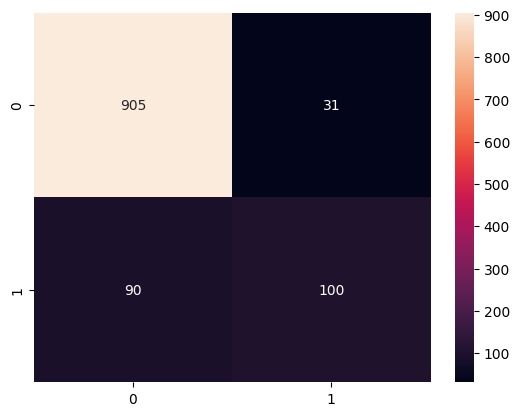

In [34]:
#confusion matrix
log_mat = confusion_matrix(y_test, log.predict(X_test))
sns.heatmap(log_mat, annot=True,fmt="g")
plt.show()

### Random Forest

In [35]:
#Build Random Forest pipeline
rf = RandomForestClassifier()

#cross validate Random Forest model
print(f"Cross validation score for Random Forest: {np.mean(cross_val_score(rf, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Random Forest: 0.8391032001885452


In [36]:
#use Random Forest pipeline to predict test and train sample
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score:",acc)
acc_score_mat["Random Forest"] = acc

Accuracy Score: 0.9786856127886323


In [37]:
#classification report:
cc =  classification_report(y_test,y_pred)
print(cc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       936
           1       0.99      0.88      0.93       190

    accuracy                           0.98      1126
   macro avg       0.99      0.94      0.96      1126
weighted avg       0.98      0.98      0.98      1126



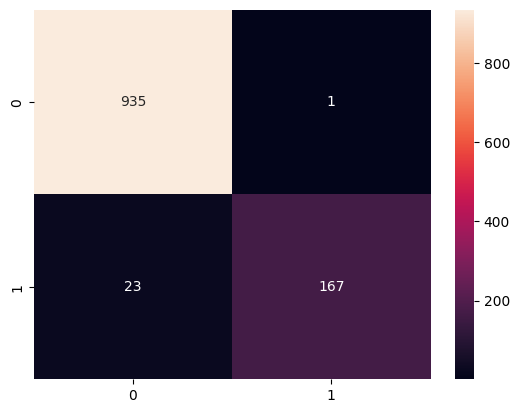

In [38]:
#confusion matrix
rf_mat = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(rf_mat, annot=True,fmt="g")
plt.show()

### XGBoost

In [39]:
#Build XGBoost pipeline
xgb =XGBClassifier()

In [40]:
#use XGBoost pipeline to predict test and train sample
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score:",acc)
acc_score_mat["XG Boost"] = acc

Accuracy Score: 0.9902309058614565


In [41]:
#classification report:
cc =  classification_report(y_test,y_pred)
print(cc)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.97      0.97      0.97       190

    accuracy                           0.99      1126
   macro avg       0.98      0.98      0.98      1126
weighted avg       0.99      0.99      0.99      1126



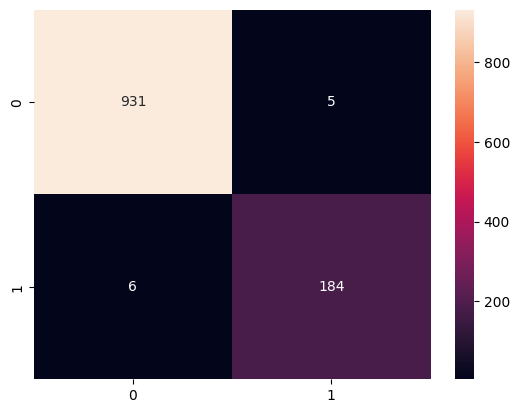

In [42]:
#confusion matrix
xgb_mat = confusion_matrix(y_test, xgb.predict(X_test))
sns.heatmap(xgb_mat, annot=True,fmt="g")
plt.show()

Comparing models

In [43]:
acc_score_mat

{'Logistic Regression': 0.8925399644760214,
 'Random Forest': 0.9786856127886323,
 'XG Boost': 0.9902309058614565}

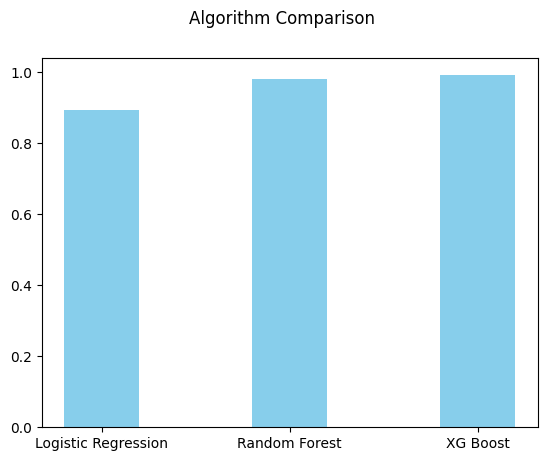

In [44]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
plt.bar(acc_score_mat.keys(),acc_score_mat.values(), color ='skyblue',width = 0.4)
plt.show()